# 팬시인덱싱
- 한번에 여러 배열 요소에 접근하기 위해 인덱스의 배열을 넣어줌
- 보편적인 사용 방법 : 행렬에서 행의 부분집합을 선택함

In [1]:
import numpy as np

In [2]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


* 방법1) 3개의 다른 요소에 접근 하여 배열로 반환

In [8]:
print(type([x[3], x[7], x[2]]))

<class 'list'>


In [4]:
result = np.array([x[3], x[7], x[2]])
print(result)
print("result ndim : ",result.ndim)
print("result shape : ",result.shape)
print("result size : ",result.size)

[71 86 14]
result ndim :  1
result shape :  (3,)
result size :  3


* 방법2) 접근할 요소의 인덱스를 배열로 만들어 넣어줌

In [15]:
index = [3,7,2,5]
result2 = x[index]
print(result2)
print("result2 type : ",type(result2))
print("result2 ndim : ",result2.ndim)
print("result2 shape : ",result2.shape)
print("result2 size : ",result2.size)

[71 86 14 20]
result2 type :  <class 'numpy.ndarray'>
result2 ndim :  1
result2 shape :  (4,)
result2 size :  4


- 팬시 인덱싱의 결과의 형상(Shape)은 **인덱스값 배열의 형상**을 따라감

In [16]:
index2 = np.array([[3,7],
                   [2,5]])
print("index2 : \n",index2)
print("index2 ndim : ",index2.ndim)
print("index2 shape : ",index2.shape)
print("index2 size : ",index2.size)

index2 : 
 [[3 7]
 [2 5]]
index2 ndim :  2
index2 shape :  (2, 2)
index2 size :  4


In [18]:
print("x : \n",x)
print("-------------")
print("result2 : \n",result2)
print("-------------")
result3 = x[index2]
print("result3 : \n",result3)
print("result3 ndim : ",result3.ndim)
print("result3 shape : ",result3.shape)
print("result3 size : ",result3.size)

x : 
 [51 92 14 71 60 20 82 86 74 74]
-------------
result2 : 
 [71 86 14 20]
-------------
result3 : 
 [[71 86]
 [14 20]]
result3 ndim :  2
result3 shape :  (2, 2)
result3 size :  4


- **다차원 배열에서 팬시인덱싱**

In [35]:
# 다차원 원본 배열 선언
arr = np.arange(12).reshape([3,4])
print("arr : \n ",arr)
print("arr ndim : ",arr.ndim)
print("arr shape : ",arr.shape)
print("arr size : ",arr.size)

arr : 
  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
arr ndim :  2
arr shape :  (3, 4)
arr size :  12


In [34]:
# 인덱싱을 위한 행과 열의 인덱스를 배열로 생성
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

print("row shape : ",row.shape)
print("col shape : ",col.shape)

# 팬시인덱싱 -> 행과 열의 인덱스로 추출
print(arr[row, col])

row shape :  (3,)
col shape :  (3,)
[ 2  5 11]


* 행과 열의 인덱스로 arr 배열에서 추출 방법
<pre><code>
arr : 
  [[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]]
</code></pre>   
<pre><code>
(행,열) ==> arr(row,col) 
(0,2) ==> 2
(1,1) ==> 5 
(2,3) ==> 11
</code></pre>

* row의 차원을 1개 늘림

In [37]:
# 행 인덱스 배열의 차원을 추가 하여 브로드케스팅 적용하여 인덱스 만들기
row_reshape = row[ : ,np.newaxis] # (3, )=>(3,1)
print("row_reshape :\n",row_reshape)
print("row_shape shape : ",row_reshape.shape)

row_reshape :
 [[0]
 [1]
 [2]]
row_shape shape :  (3, 1)


In [39]:
print("arr : \n",arr)
arr_reshape = arr[row_reshape, col]
print("\n\n")
print("arr_reshape :\n",arr_reshape)
print("ndim : ",arr_reshape.ndim)
print("shape : ",arr_reshape.shape)
print("size : ",arr_reshape.size)

arr : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]



arr_reshape :
 [[ 2  1  3]
 [ 6  5  7]
 [10  9 11]]
ndim :  2
shape :  (3, 3)
size :  9


- 브로드케스팅을 이용하여 인덱스 조합
<pre><code>
row_reshape(3,1) *  col(3, ) 
[[0]
 [1]              *  [2,1,3]
 [2]]
</code></pre>
-브로드 케스팅을 통한 결과 = > (3,3) 이 됨
<pre><code>
[[0, 0, 0],          [[2, 1, 3],
  [1, 1, 1],       *   [2, 1, 3],
  [2, 2, 2]]           [2, 1, 3]]
</code></pre> 


In [42]:
# 브로드 케스팅 과정
#(3,1) * (3,)
#(3,1) * (1,3) <-규칙 1 적용
#(3,3)         <-규칙 2 적용
print("row_reshape * col 결과 : \n",row_reshape * col)

row_reshape * col 결과 : 
 [[0 0 0]
 [2 1 3]
 [4 2 6]]


In [43]:
print("arr[row_reshape, col] 팬시인덱싱 결과 \n",arr[row_reshape, col])

arr[row_reshape, col] 팬시인덱싱 결과 
 [[ 2  1  3]
 [ 6  5  7]
 [10  9 11]]


<pre><code>
(row,col) = > row_reshape => arr[row_reshape, col] 
(0,2)     = > 0           => 2 
(0,1)     = > 0           => 1
(0,3)     = > 0           => 3

(1,2)     = > 2           => 6
(1,1)     = > 1           => 5
(1,3)     = > 3           => 7

(2,2)     = > 4           => 10
(2,1)     = > 2           => 9
(2,3)     = > 6           => 7
</code></pre>

### 결합 인덱싱

In [44]:
print("arr : \n",arr)

arr : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


- 팬시인덱스 + 일반 인덱스 조합

In [45]:
# (2,2) (2,0) (2,1)
arr[2, [2, 0, 1]]

array([10,  8,  9])

In [46]:
print(arr[2,2])
print(arr[2,0])
print(arr[2,1])

10
8
9


- 팬시인덱스 + 슬라이싱

In [48]:
# (1,2) (1,0) (1,1)
# (2,2) (2,0) (2,1)
arr[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [50]:
print(arr[1,2])
print(arr[1,0])
print(arr[1,1])
print(arr[2,2])
print(arr[2,0])
print(arr[2,1])

6
4
5
10
8
9


###### 예) 임의의 점 선택

In [55]:
# 평균 
mean = [0,0]

# 공분산(Covariance) : 확률변수들이 어떻게 퍼져있는지를 나타내는 것
cov = [[1, 2],
       [2, 5]]

# 다변수 정규분포 (multivariate_normal)
X = rand.multivariate_normal(mean=mean, cov=cov, size= [100])
print(X.shape)
print(X)

(100, 2)
[[ 3.57137686e-01  2.35807765e+00]
 [-6.05119455e-01 -2.11454898e+00]
 [-3.79703356e-01 -6.38285610e-01]
 [-3.55777152e-01  8.48308764e-02]
 [-1.33074012e+00 -3.20478249e+00]
 [-1.60774279e+00 -2.81181164e+00]
 [-2.82035186e-01 -4.90196315e-01]
 [ 1.63915076e+00  2.33283998e+00]
 [ 1.75088631e-01 -5.03749438e-01]
 [ 2.41225594e-01  3.65531806e-03]
 [ 1.51562079e+00  4.04577591e+00]
 [ 3.52286732e-01  9.37301867e-01]
 [ 9.53264554e-01  1.93898064e+00]
 [-1.49079761e+00 -3.45996122e+00]
 [-2.14007516e-02 -1.42724772e+00]
 [-2.91262533e+00 -5.03640289e+00]
 [-1.57680515e+00 -2.90969456e+00]
 [-1.83164967e-01  3.62981204e-02]
 [-7.27700763e-01 -2.43718404e+00]
 [ 1.04941259e+00  7.26850266e-01]
 [ 7.73152003e-02  1.98483544e+00]
 [ 4.30438791e-01  6.95136156e-01]
 [ 3.23394222e-01 -9.64319545e-01]
 [-1.35805172e+00 -1.90787797e+00]
 [-9.80520961e-01 -5.79777574e-01]
 [ 5.20273222e-01  3.25167427e+00]
 [ 1.16492110e+00  1.42699319e+00]
 [-4.97063985e-01  8.26225733e-01]
 [ 3.748495

- 다변수 정규분포
  - `numpy.random.multivariate_normal(mean, cov[, size, check_valid, tol])`

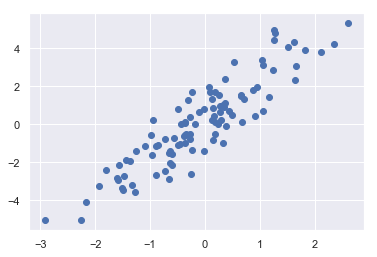

In [59]:
# X(2차원 정규분포에 의한 데이터) 배열 도식화 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

- 팬시 인덱싱을 이용하여 20개 데이터 선택
- np.random.choice : 랜덤하게 size 만큼 선택
  - `numpy.random.choice(a, size=None, replace=True, p=None)`
  - a : 1-D array-like or int  


In [64]:
print("a : ",X.shape[0])
# 100 개중 20개 인덱스 추출
indices = np.random.choice(X.shape[0], 20, replace=False)
print(indices)

a :  100
[53 17 86 90 78 38 95 27 72 34 60 15 55 63 59 68 75 85 83 67]


In [66]:
selection_X = X[indices]
print(selection_X.shape)

(20, 2)


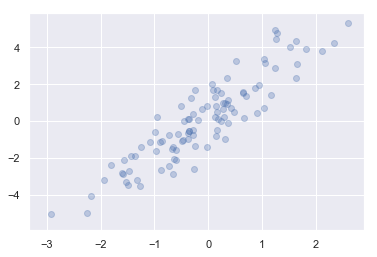

In [70]:
# 추출한 점을 도식화
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection_X[:, 0], selection_X[:, 1], facecolor='none', s=200);